In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("Pune house data.csv")

In [3]:
df1.head(5)

,area_type,availability,size,society,total_sqft,bath,balcony,site_location,price
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,Alandi Road,39.07
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,Ambegaon Budruk,120.00
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,Anandnagar,62.00
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,Aundh,95.00
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,Aundh Road,51.00


In [4]:
df1.groupby('area_type')["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df2=df1.drop(columns=["area_type","availability","society","balcony"])
df2

,size,total_sqft,bath,site_location,price
0,2 BHK,1056,2.0,Alandi Road,39.07
1,4 Bedroom,2600,5.0,Ambegaon Budruk,120.00
2,3 BHK,1440,2.0,Anandnagar,62.00
3,3 BHK,1521,3.0,Aundh,95.00
4,2 BHK,1200,2.0,Aundh Road,51.00
...,...,...,...,...,...
13315,5 Bedroom,3453,4.0,Pashan,231.00
13316,4 BHK,3600,5.0,Paud Road,400.00
13317,2 BHK,1141,2.0,Pirangut,60.00
13318,4 BHK,4689,4.0,Prabhat Road,488.00


In [7]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
site_location     1
price             0
dtype: int64

In [8]:
df3=df2.dropna()

In [9]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3["Bhk"]=df3["size"].apply(lambda x:int(x.split(" ")[0]))

C:\Users\sanje\AppData\Local\Temp\ipykernel_43208\3874759743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Bhk"]=df3["size"].apply(lambda x:int(x.split(" ")[0]))


In [11]:
df3

,size,total_sqft,bath,site_location,price,Bhk
0,2 BHK,1056,2.0,Alandi Road,39.07,2
1,4 Bedroom,2600,5.0,Ambegaon Budruk,120.00,4
2,3 BHK,1440,2.0,Anandnagar,62.00,3
3,3 BHK,1521,3.0,Aundh,95.00,3
4,2 BHK,1200,2.0,Aundh Road,51.00,2
...,...,...,...,...,...,...
13315,5 Bedroom,3453,4.0,Pashan,231.00,5
13316,4 BHK,3600,5.0,Paud Road,400.00,4
13317,2 BHK,1141,2.0,Pirangut,60.00,2
13318,4 BHK,4689,4.0,Prabhat Road,488.00,4


In [12]:
df3.isnull().sum()

size             0
total_sqft       0
bath             0
site_location    0
price            0
Bhk              0
dtype: int64

In [13]:
df3["Bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3["Bhk"]>20]

,size,total_sqft,bath,site_location,price,Bhk
1718,27 BHK,8000,27.0,Uruli Devachi,230.0,27
4684,43 Bedroom,2400,40.0,Salunke Vihar,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3["total_sqft"].apply(is_float)]

,size,total_sqft,bath,site_location,price,Bhk
30,4 BHK,2100 - 2850,4.0,Gultekdi,186.000,4
122,4 BHK,3067 - 8156,4.0,Ganeshkhind,477.000,4
137,2 BHK,1042 - 1105,2.0,Khadaki,54.005,2
165,2 BHK,1145 - 1340,2.0,Prabhat Road,43.490,2
188,2 BHK,1015 - 1540,2.0,Wakadewadi,56.800,2
...,...,...,...,...,...,...
12975,2 BHK,850 - 1060,2.0,Camp,38.190,2
12990,3 BHK,1804 - 2273,3.0,Gokhale Nagar,122.000,3
13059,2 BHK,1200 - 1470,2.0,Anandnagar,72.760,2
13265,2 BHK,1133 - 1384,2.0,Dapodi,59.135,2


In [18]:
def convert_sqft_to_num(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_num)

In [20]:
df4["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [21]:
df4

,size,total_sqft,bath,site_location,price,Bhk
0,2 BHK,1056.0,2.0,Alandi Road,39.07,2
1,4 Bedroom,2600.0,5.0,Ambegaon Budruk,120.00,4
2,3 BHK,1440.0,2.0,Anandnagar,62.00,3
3,3 BHK,1521.0,3.0,Aundh,95.00,3
4,2 BHK,1200.0,2.0,Aundh Road,51.00,2
...,...,...,...,...,...,...
13315,5 Bedroom,3453.0,4.0,Pashan,231.00,5
13316,4 BHK,3600.0,5.0,Paud Road,400.00,4
13317,2 BHK,1141.0,2.0,Pirangut,60.00,2
13318,4 BHK,4689.0,4.0,Prabhat Road,488.00,4


In [22]:
df4[~df4["total_sqft"].apply(is_float)]

,size,total_sqft,bath,site_location,price,Bhk


In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           13246 non-null  object 
 1   total_sqft     13200 non-null  float64
 2   bath           13246 non-null  float64
 3   site_location  13246 non-null  object 
 4   price          13246 non-null  float64
 5   Bhk            13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [24]:
df4.isnull().sum()

size              0
total_sqft       46
bath              0
site_location     0
price             0
Bhk               0
dtype: int64

In [25]:
df5=df4.copy()
df5["price_per_sqft"]=(df5["price"]*100000)/df5["total_sqft"]

In [26]:
df5

,size,total_sqft,bath,site_location,price,Bhk,price_per_sqft
0,2 BHK,1056.0,2.0,Alandi Road,39.07,2,3699.810606
1,4 Bedroom,2600.0,5.0,Ambegaon Budruk,120.00,4,4615.384615
2,3 BHK,1440.0,2.0,Anandnagar,62.00,3,4305.555556
3,3 BHK,1521.0,3.0,Aundh,95.00,3,6245.890861
4,2 BHK,1200.0,2.0,Aundh Road,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,5 Bedroom,3453.0,4.0,Pashan,231.00,5,6689.834926
13316,4 BHK,3600.0,5.0,Paud Road,400.00,4,11111.111111
13317,2 BHK,1141.0,2.0,Pirangut,60.00,2,5258.545136
13318,4 BHK,4689.0,4.0,Prabhat Road,488.00,4,10407.336319


In [27]:
df5["site_location"]=df5["site_location"].apply(lambda x:x.strip())
location_stats=df5.groupby("site_location")["site_location"].agg("count")
location_stats

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         137
Aundh              137
Aundh Road         139
                  ... 
Wakadewadi         136
Wanowrie           136
Warje              137
Yerawada           136
other                1
Name: site_location, Length: 97, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1

In [29]:
df6=df5[~(df5["total_sqft"]/df5["Bhk"]<300)]

In [30]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("site_location"):
        m=np.mean(subdf["price_per_sqft"])
        st=np.std(subdf["price_per_sqft"])
        reduced_df=subdf[(subdf["price_per_sqft"]>m-st)&(subdf["price_per_sqft"]<m+st)]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [31]:
df7=remove_pps_outlier(df6)

In [32]:
df7

,size,total_sqft,bath,site_location,price,Bhk,price_per_sqft
0,2 BHK,1056.0,2.0,Alandi Road,39.07,2,3699.810606
1,4 Bedroom,2894.0,4.0,Alandi Road,245.00,4,8465.791292
2,2 BHK,1084.0,2.0,Alandi Road,50.00,2,4612.546125
3,2 BHK,1230.0,2.0,Alandi Road,80.00,2,6504.065041
4,3 BHK,1750.0,3.0,Alandi Road,130.00,3,7428.571429
...,...,...,...,...,...,...,...
10878,2 BHK,1050.0,2.0,Yerawada,54.00,2,5142.857143
10879,2 BHK,970.0,2.0,Yerawada,45.00,2,4639.175258
10880,2 BHK,1140.0,2.0,Yerawada,57.00,2,5000.000000
10881,3 BHK,1464.0,3.0,Yerawada,56.00,3,3825.136612


In [33]:
df7.isnull().sum()

size              0
total_sqft        0
bath              0
site_location     0
price             0
Bhk               0
price_per_sqft    0
dtype: int64

In [34]:
def plot_scatter_chart(df, location):
    # Clean column names just in case
    df.columns = df.columns.str.strip()
    
    bhk2 = df[(df["site_location"] == location) & (df["Bhk"] == 2)]
    bhk3 = df[(df["site_location"] == location) & (df["Bhk"] == 3)]
    
    import matplotlib.pyplot as plt
    import matplotlib
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2["total_sqft"], bhk2["price"], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3["total_sqft"], bhk3["price"], marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()


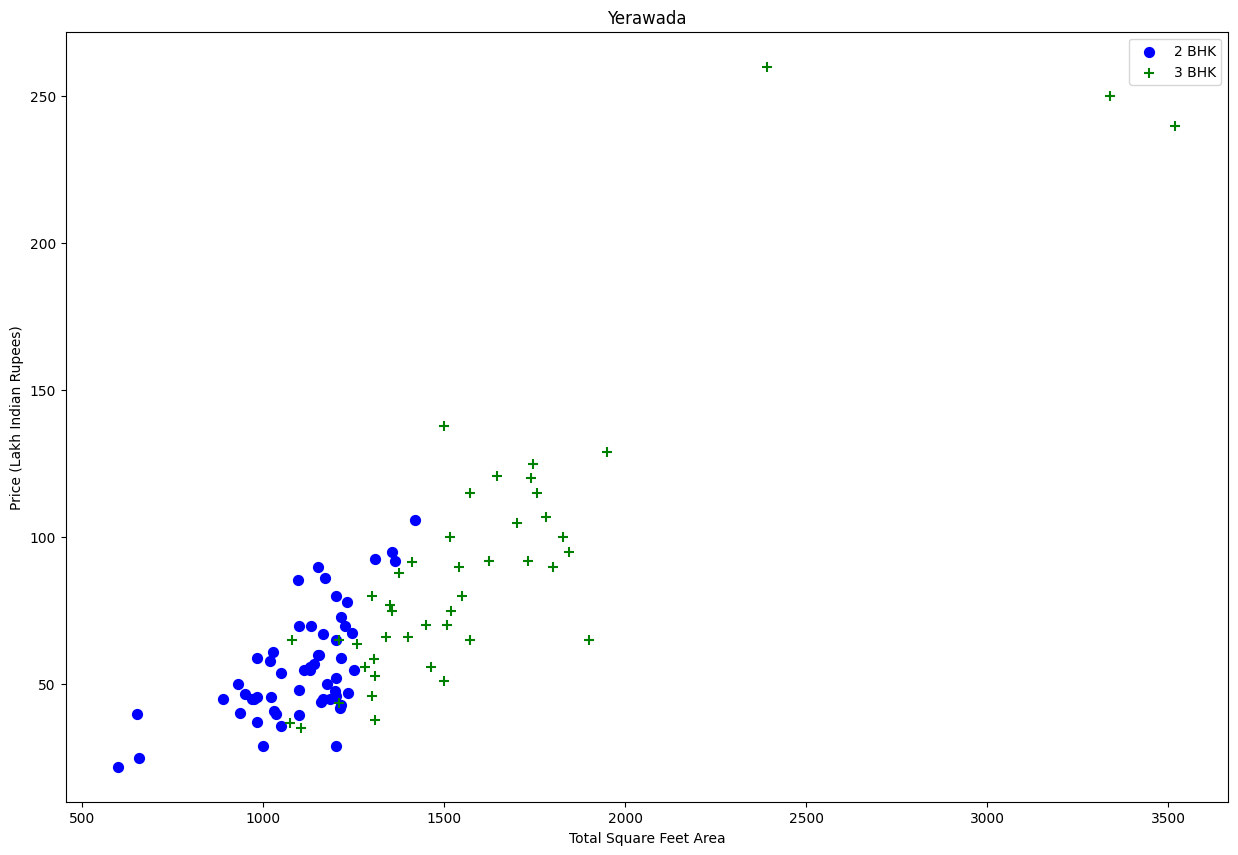

In [35]:
plot_scatter_chart(df7,"Yerawada")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7543, 7)

In [37]:
df8

,size,total_sqft,bath,site_location,price,Bhk,price_per_sqft
0,2 BHK,1056.0,2.0,Alandi Road,39.07,2,3699.810606
1,4 Bedroom,2894.0,4.0,Alandi Road,245.00,4,8465.791292
2,2 BHK,1084.0,2.0,Alandi Road,50.00,2,4612.546125
3,2 BHK,1230.0,2.0,Alandi Road,80.00,2,6504.065041
4,3 BHK,1750.0,3.0,Alandi Road,130.00,3,7428.571429
...,...,...,...,...,...,...,...
10870,2 BHK,1165.0,2.0,Yerawada,67.00,2,5751.072961
10872,4 BHK,3122.0,6.0,Yerawada,250.00,4,8007.687380
10875,6 Bedroom,3500.0,6.0,Yerawada,115.00,6,3285.714286
10878,2 BHK,1050.0,2.0,Yerawada,54.00,2,5142.857143


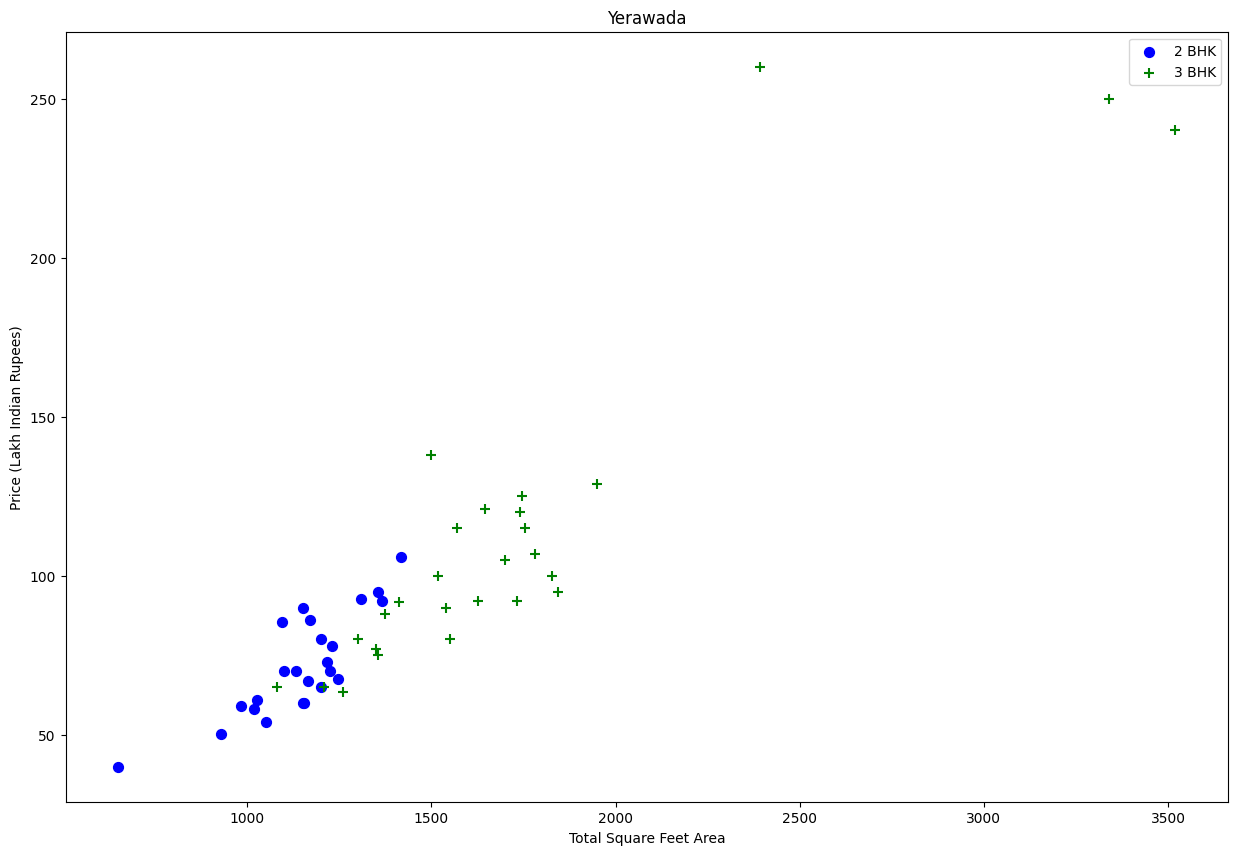

In [38]:
plot_scatter_chart(df8,"Yerawada")

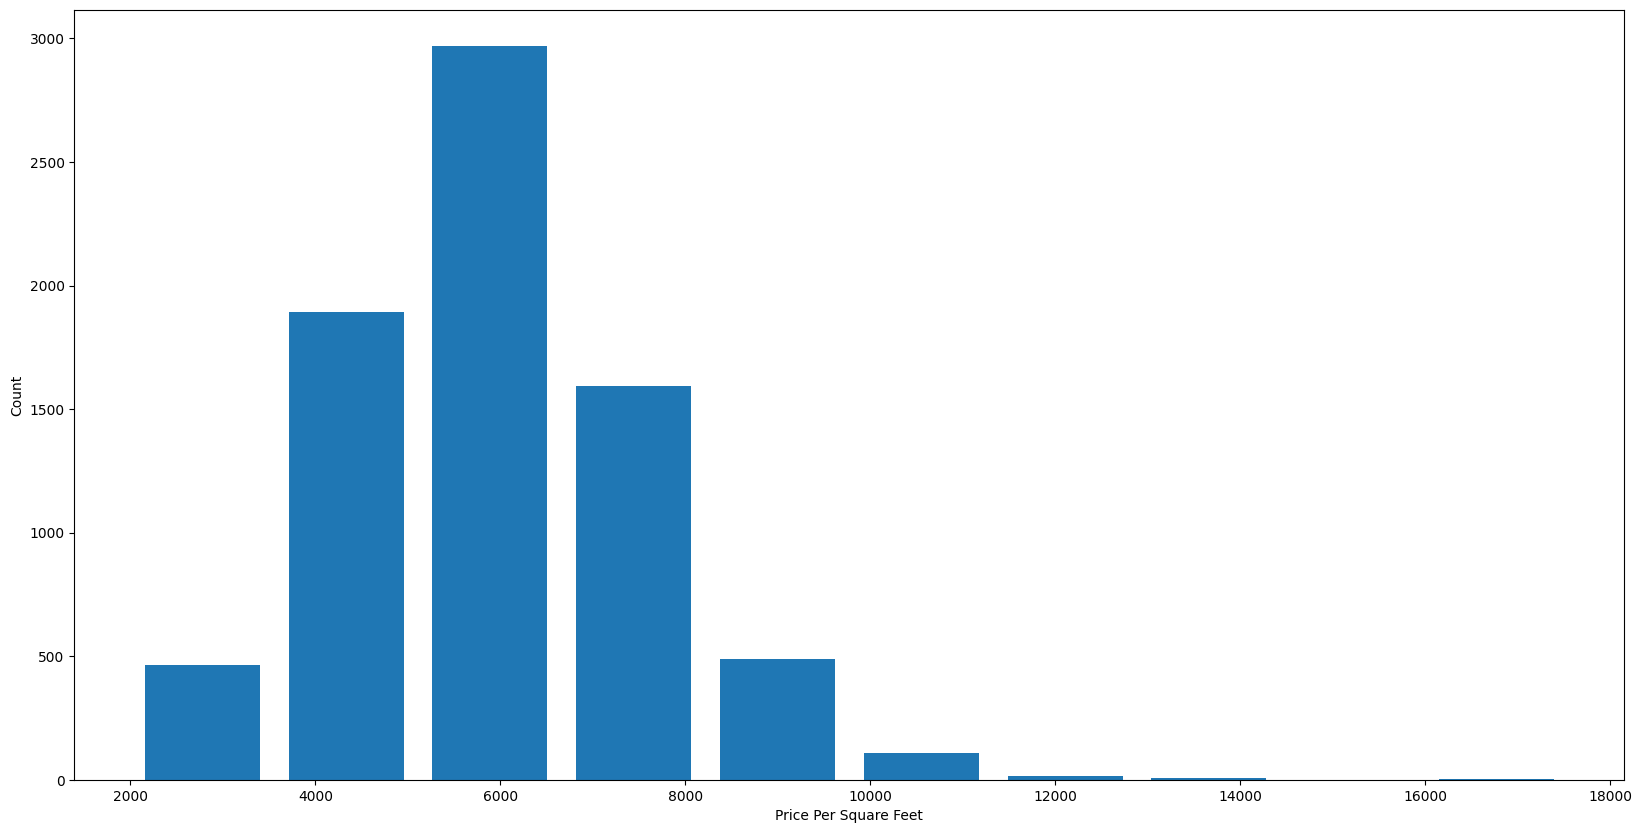

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [40]:
df8["bath"].unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [41]:
df8[df8["bath"]>10].head(10)

,size,total_sqft,bath,site_location,price,Bhk,price_per_sqft
1211,11 BHK,6000.0,12.0,Bibvewadi,150.0,11,2500.000000
2637,10 BHK,12000.0,12.0,Fatima Nagar,525.0,10,4375.000000
5265,13 BHK,5425.0,13.0,Kondhwa Khurd,275.0,13,5069.124424
6350,16 BHK,10000.0,16.0,Model colony,550.0,16,5500.000000
10389,10 BHK,4000.0,12.0,Wagholi,160.0,10,4000.000000


In [42]:
df9=df8[df8["bath"]<df8["Bhk"]+2]

In [43]:
df9

,size,total_sqft,bath,site_location,price,Bhk,price_per_sqft
0,2 BHK,1056.0,2.0,Alandi Road,39.07,2,3699.810606
1,4 Bedroom,2894.0,4.0,Alandi Road,245.00,4,8465.791292
2,2 BHK,1084.0,2.0,Alandi Road,50.00,2,4612.546125
3,2 BHK,1230.0,2.0,Alandi Road,80.00,2,6504.065041
4,3 BHK,1750.0,3.0,Alandi Road,130.00,3,7428.571429
...,...,...,...,...,...,...,...
10868,3 BHK,1355.0,2.0,Yerawada,75.00,3,5535.055351
10870,2 BHK,1165.0,2.0,Yerawada,67.00,2,5751.072961
10875,6 Bedroom,3500.0,6.0,Yerawada,115.00,6,3285.714286
10878,2 BHK,1050.0,2.0,Yerawada,54.00,2,5142.857143


In [44]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,total_sqft,bath,site_location,price,Bhk
0,1056.0,2.0,Alandi Road,39.07,2
1,2894.0,4.0,Alandi Road,245.00,4
2,1084.0,2.0,Alandi Road,50.00,2


In [45]:
dummies=pd.get_dummies(df10["site_location"])

In [46]:
len(df10["site_location"].unique())

96

In [47]:
df10["site_location"].value_counts()



site_location
Paud Road           104
Alandi Road         101
Somwar Peth         101
Raviwar Peth        101
Kondhwa Budruk      101
                   ... 
Dhole Patil Road     52
Aundh Road           50
Dhayari Phata        49
Vishrant Wadi        47
Rasta Peth           37
Name: count, Length: 96, dtype: int64

In [48]:
df11=pd.concat([df10,dummies],axis='columns')

In [49]:
df11

,total_sqft,bath,site_location,price,Bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,Alandi Road,39.07,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,Alandi Road,245.00,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,Alandi Road,50.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,Alandi Road,80.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,Alandi Road,130.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,1355.0,2.0,Yerawada,75.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10870,1165.0,2.0,Yerawada,67.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10875,3500.0,6.0,Yerawada,115.00,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10878,1050.0,2.0,Yerawada,54.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [50]:
df11

,total_sqft,bath,site_location,price,Bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,Alandi Road,39.07,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,Alandi Road,245.00,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,Alandi Road,50.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,Alandi Road,80.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,Alandi Road,130.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,1355.0,2.0,Yerawada,75.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10870,1165.0,2.0,Yerawada,67.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10875,3500.0,6.0,Yerawada,115.00,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10878,1050.0,2.0,Yerawada,54.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [51]:
df11.columns

Index(['total_sqft', 'bath', 'site_location', 'price', 'Bhk', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road',
       ...
       'Uruli Devachi', 'Vadgaon Budruk', 'Viman Nagar', 'Vishrant Wadi',
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada'],
      dtype='object', length=101)

In [52]:
df12= df11.drop('site_location',axis='columns')
df12.head(2)

,total_sqft,bath,price,Bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
x=df12.drop(columns=["price"])
y=df12["price"]

In [54]:
x.shape

(7479, 99)

In [55]:
len(y)

7479

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)*100

82.34642712561823

In [58]:
x


,total_sqft,bath,Bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,1355.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10870,1165.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10875,3500.0,6.0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10878,1050.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
len(lr_clf.coef_)

99

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7479 entries, 0 to 10882
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_sqft                  7479 non-null   float64
 1   bath                        7479 non-null   float64
 2   Bhk                         7479 non-null   int64  
 3   Alandi Road                 7479 non-null   bool   
 4   Ambegaon Budruk             7479 non-null   bool   
 5   Anandnagar                  7479 non-null   bool   
 6   Aundh                       7479 non-null   bool   
 7   Aundh Road                  7479 non-null   bool   
 8   Balaji Nagar                7479 non-null   bool   
 9   Baner                       7479 non-null   bool   
 10  Baner road                  7479 non-null   bool   
 11  Bhandarkar Road             7479 non-null   bool   
 12  Bhavani Peth                7479 non-null   bool   
 13  Bibvewadi                   7479 non-

In [61]:
print(x_train.dtypes)

total_sqft         float64
bath               float64
Bhk                  int64
Alandi Road           bool
Ambegaon Budruk       bool
                    ...   
Wagholi               bool
Wakadewadi            bool
Wanowrie              bool
Warje                 bool
Yerawada              bool
Length: 99, dtype: object


In [62]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [63]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)


array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso



In [65]:
def find_best_model_using_grid_search(x,y):
    algos={
        'linear_reggresion':{
            'model':LinearRegression(),
            'params':{
                 "fit_intercept": [True, False],
                 "positive": [True, False]
             }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decison_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }
            
        )
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_grid_search(x,y)
    
    

,model,best_score,best_params
0,linear_reggresion,0.860634,"{'fit_intercept': True, 'positive': True}"
1,Lasso,0.857851,"{'alpha': 2, 'selection': 'cyclic'}"
2,decison_tree,0.783089,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [66]:
dt=DecisionTreeRegressor(splitter='best',criterion='squared_error')
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(76.2442971566674, 99.70354323390845)

In [67]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeRegressor(splitter='random',criterion='friedman_mse'),x,y,cv=cv)


array([0.53537973, 0.86245631, 0.77038554, 0.87250383, 0.76138514])

In [78]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
        
    return lr_clf.predict([X])[0]

In [95]:
predict_price("Alandi Road",7000,10,10)

C:\Users\sanje\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


499.1908026889381

In [85]:
predict_price("Ambegaon Budruk",2600,5,4)

C:\Users\sanje\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


175.66068096082253

In [97]:
import pickle
with open('pune_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [98]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))